<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n20.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.975646,63.650506,36.448046,71.228792,-1.133876,240.169114,240.958879,-0.789765
1,0.0,1.0,34.607308,54.626686,56.390996,20.262673,0.026762,175.914424,175.797780,0.116644
2,0.0,2.0,67.723723,37.053595,31.760869,36.759827,0.201717,183.499731,183.191370,0.308360
3,0.0,3.0,88.391551,90.877227,32.407086,84.136828,0.502385,306.315077,305.588445,0.726631
4,0.0,4.0,90.369852,46.997412,39.168989,23.984412,-0.091214,210.429450,210.686766,-0.257316
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.481714,51.974999,99.959796,78.342579,0.210845,287.969932,287.766961,0.202971
29996,999.0,26.0,91.473501,26.962379,79.238915,51.315583,0.015023,259.005401,259.071317,-0.065916
29997,999.0,27.0,28.352228,57.827880,95.298100,89.183512,0.792821,281.454541,280.625677,0.828864
29998,999.0,28.0,48.833667,25.684105,73.457548,37.215358,0.555492,195.746170,195.288072,0.458099


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.975646,63.650506,36.448046,71.228792,-1.133876,240.169114,240.958879,-0.789765
1,0.0,1.0,34.607308,54.626686,56.390996,20.262673,0.026762,175.914424,175.797780,0.116644
2,0.0,2.0,67.723723,37.053595,31.760869,36.759827,0.201717,183.499731,183.191370,0.308360
3,0.0,3.0,88.391551,90.877227,32.407086,84.136828,0.502385,306.315077,305.588445,0.726631
4,0.0,4.0,90.369852,46.997412,39.168989,23.984412,-0.091214,210.429450,210.686766,-0.257316
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.481714,51.974999,99.959796,78.342579,0.210845,287.969932,287.766961,0.202971
29996,999.0,26.0,91.473501,26.962379,79.238915,51.315583,0.015023,259.005401,259.071317,-0.065916
29997,999.0,27.0,28.352228,57.827880,95.298100,89.183512,0.792821,281.454541,280.625677,0.828864
29998,999.0,28.0,48.833667,25.684105,73.457548,37.215358,0.555492,195.746170,195.288072,0.458099


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    59.975646  63.650506  36.448046  71.228792 -1.133876  240.169114   
      1.0    34.607308  54.626686  56.390996  20.262673  0.026762  175.914424   
      2.0    67.723723  37.053595  31.760869  36.759827  0.201717  183.499731   
      3.0    88.391551  90.877227  32.407086  84.136828  0.502385  306.315077   
      4.0    90.369852  46.997412  39.168989  23.984412 -0.091214  210.429450   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   47.481714  51.974999  99.959796  78.342579  0.210845  287.969932   
      26.0   91.473501  26.962379  79.238915  51.315583  0.015023  259.005401   
      27.0   28.352228  57.827880  95.298100  89.183512  0.792821  281.454541   
      28.0   48.833667  25.684105  73.457548  37.215358  0.555492  195.746170   
      29.0   95.396684  56.256546  64.283342  32.406366 -0.125786  258.217152   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    240.958879 -0.789765  
      1.0    175.797780  0.116644  
      2.0    183.191370  0.308360  
      3.0    305.588445  0.726631  
      4.0    210.686766 -0.257316  
...                 ...       ...  
999.0 25.0   287.766961  0.202971  
      26.0   259.071317 -0.065916  
      27.0   280.625677  0.828864  
      28.0   195.288072  0.458099  
      29.0   258.356894 -0.139742  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    59.975646  63.650506  36.448046  71.228792 -1.133876  240.169114   
      1.0    34.607308  54.626686  56.390996  20.262673  0.026762  175.914424   
      2.0    67.723723  37.053595  31.760869  36.759827  0.201717  183.499731   
      3.0    88.391551  90.877227  32.407086  84.136828  0.502385  306.315077   
      4.0    90.369852  46.997412  39.168989  23.984412 -0.091214  210.429450   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   47.481714  51.974999  99.959796  78.342579  0.210845  287.969932   
      26.0   91.473501  26.962379  79.238915  51.315583  0.015023  259.005401   
      27.0   28.352228  57.827880  95.298100  89.183512  0.792821  281.454541   
      28.0   48.833667  25.684105  73.457548  37.215358  0.555492  195.746170   
      29.0   95.396684  56.256546  64.283342  32.406366 -0.125786  258.217152   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    240.958879 -0.789765  
      1.0    175.797780  0.116644  
      2.0    183.191370  0.308360  
      3.0    305.588445  0.726631  
      4.0    210.686766 -0.257316  
...                 ...       ...  
999.0 25.0   287.766961  0.202971  
      26.0   259.071317 -0.065916  
      27.0   280.625677  0.828864  
      28.0   195.288072  0.458099  
      29.0   258.356894 -0.139742  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,59.975646,63.650506,36.448046,71.228792,-1.133876,240.169114,240.958879,-0.789765
1,0.0,1.0,34.607308,54.626686,56.390996,20.262673,0.026762,175.914424,175.797780,0.116644
2,0.0,2.0,67.723723,37.053595,31.760869,36.759827,0.201717,183.499731,183.191370,0.308360
3,0.0,3.0,88.391551,90.877227,32.407086,84.136828,0.502385,306.315077,305.588445,0.726631
4,0.0,4.0,90.369852,46.997412,39.168989,23.984412,-0.091214,210.429450,210.686766,-0.257316
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,47.481714,51.974999,99.959796,78.342579,0.210845,287.969932,287.766961,0.202971
29996,999.0,26.0,91.473501,26.962379,79.238915,51.315583,0.015023,259.005401,259.071317,-0.065916
29997,999.0,27.0,28.352228,57.827880,95.298100,89.183512,0.792821,281.454541,280.625677,0.828864
29998,999.0,28.0,48.833667,25.684105,73.457548,37.215358,0.555492,195.746170,195.288072,0.458099


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    59.975646  63.650506  36.448046  71.228792 -1.133876  240.169114   
      1.0    34.607308  54.626686  56.390996  20.262673  0.026762  175.914424   
      2.0    67.723723  37.053595  31.760869  36.759827  0.201717  183.499731   
      3.0    88.391551  90.877227  32.407086  84.136828  0.502385  306.315077   
      4.0    90.369852  46.997412  39.168989  23.984412 -0.091214  210.429450   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   47.481714  51.974999  99.959796  78.342579  0.210845  287.969932   
      26.0   91.473501  26.962379  79.238915  51.315583  0.015023  259.005401   
      27.0   28.352228  57.827880  95.298100  89.183512  0.792821  281.454541   
      28.0   48.833667  25.684105  73.457548  37.215358  0.555492  195.746170   
      29.0   95.396684  56.256546  64.283342  32.406366 -0.125786  258.217152   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    240.958879 -0.789765  
      1.0    175.797780  0.116644  
      2.0    183.191370  0.308360  
      3.0    305.588445  0.726631  
      4.0    210.686766 -0.257316  
...                 ...       ...  
999.0 25.0   287.766961  0.202971  
      26.0   259.071317 -0.065916  
      27.0   280.625677  0.828864  
      28.0   195.288072  0.458099  
      29.0   258.356894 -0.139742  

[30000 rows x 8 columns]

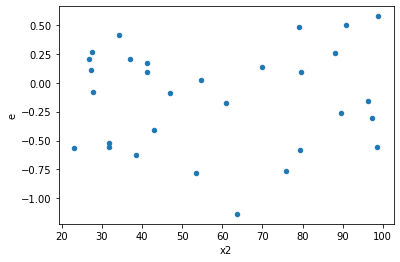

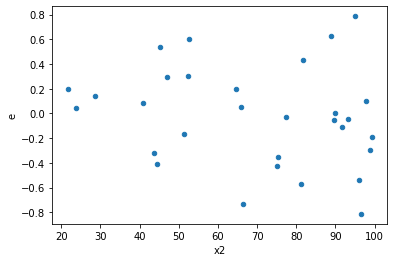

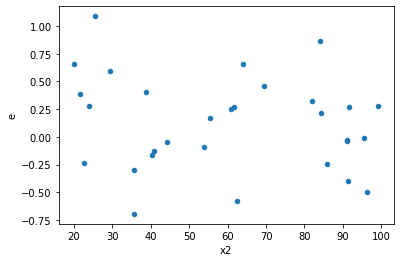

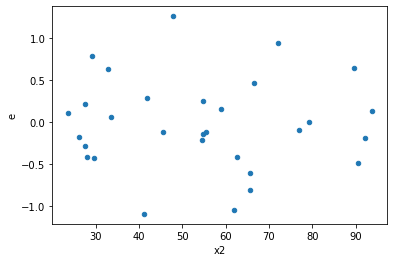

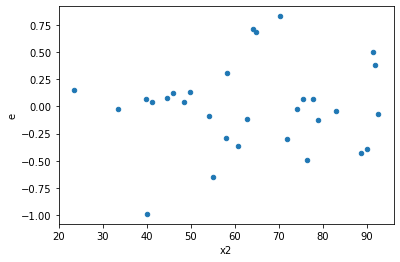

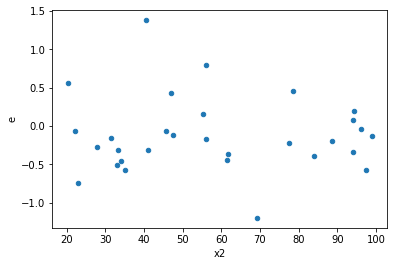

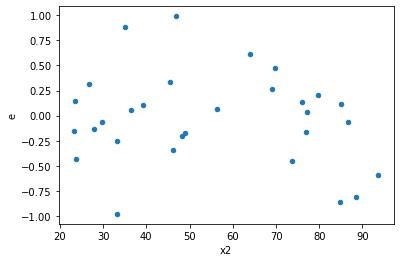

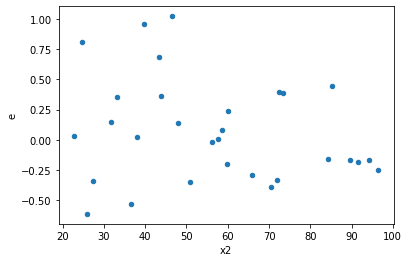

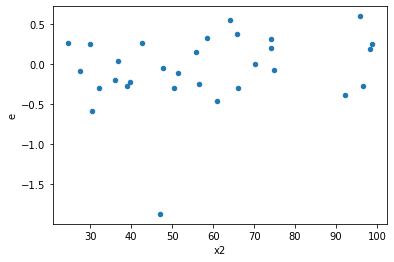

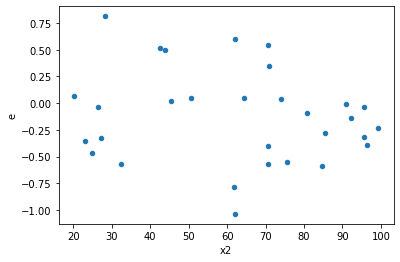

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,0.9420332913538869,0.9921724064071102,0.11775416141923586,0.12402155080088878,1.0532243557774519,0.9433329954902154,0.5283335022548923,0.4716664977451077,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,1.0366414603152356,2.7032248501947396,0.12958018253940445,0.33790310627434245,2.607675800823852,0.19679784975479864,0.9016010751226007,0.09839892487739932,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,0.8654037206019796,1.1992448490209755,0.10817546507524745,0.14990560612762194,1.385763454063699,0.6553979807456178,0.6723010096271911,0.3276989903728089,Reject001=1 : Homoscedasticity
10.0,8.0,8.0,0.8138855108683527,1.684116265836561,0.10173568885854409,0.21051453322957012,2.0692299387904565,0.32388443136508527,0.8380577843174574,0.16194221568254263,Reject001=1 : Homoscedasticity
11.0,8.0,8.0,1.4227757949033653,2.9824408928659882,0.17784697436292066,0.37280511160824853,2.0962128422128203,0.31551519987703447,0.8422424000614828,0.15775759993851723,Reject001=1 : Homoscedasticity
15.0,8.0,8.0,0.26003924796933336,1.827369071184352,0.03250490599616667,0.228421133898044,7.027281787093366,0.012322911886595067,0.9938385440567025,0.0061614559432975335,Reject001=1 : Homoscedasticity
19.0,8.0,8.0,0.2783384159226081,0.8950386080529076,0.03479230199032601,0.11187982600661345,3.215648853522874,0.1187091036559691,0.9406454481720155,0.05935455182798455,Reject001=1 : Homoscedasticity
22.0,8.0,8.0,0.7933247763758173,1.9452176487888377,0.09916559704697717,0.24315220609860472,2.4519814667522,0.2261245568385033,0.8869377215807484,0.11306227841925165,Reject001=1 : Homoscedasticity
26.0,8.0,8.0,1.0267127966713794,3.32215490244116,0.12833909958392242,0.415269362805145,3.2357197779278133,0.11685376785594381,0.9415731160720281,0.05842688392797191,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,0.9420332913538869,0.9921724064071102,0.11775416141923586,0.12402155080088878,1.0532243557774519,0.9433329954902154,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,1.557652918810833,1.498252285650559,0.19470661485135413,0.18728153570631986,0.9618652958929884,0.95749547450115,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,1.5562354268126377,0.7867363697709511,0.19452942835157971,0.09834204622136888,0.5055381443039658,0.35417030288835716,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,2.017636804624548,1.2132586136728913,0.2522046005780685,0.15165732670911142,0.6013265672454169,0.48791003843372355,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,1.4626861543151715,0.49694708593010467,0.18283576928939643,0.062118385741263084,0.33974963423563337,0.1478382306158934,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,1.0366414603152356,2.7032248501947396,0.12958018253940445,0.33790310627434245,2.607675800823852,0.19679784975479864,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,0.8654037206019796,1.1992448490209755,0.10817546507524745,0.14990560612762194,1.385763454063699,0.6553979807456178,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,1.91813430049105,0.5698294378134946,0.23976678756138126,0.07122867972668682,0.2970748386427457,0.10562615963456401,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,3.0011613042406804,0.45995013161745707,0.37514516303008505,0.057493766452182134,0.15325738438901684,0.01561023817900631,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      980
Reject001=0 : Heteroscedasticity     20
Name: Result_test, dtype: int64